In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('SampleSuperstore.csv',encoding='latin1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
if df.duplicated().sum() == 0 :
    print('no duplicates') 
else :
    print('duplicates') 

no duplicates


# customer type

In [6]:
no_of_customers = df['Segment'].value_counts().reset_index()
no_of_customers = no_of_customers.rename(columns={'Segment' : 'Customer Type'})

no_of_customers

,Customer Type,count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


([<matplotlib.patches.Wedge at 0x1a299fed750>,
 [Text(-0.06704023782468152, 1.0979551933081833, 'Consumer'),
  Text(-0.5268842285426254, -0.9656049967316049, 'Corporate'),
  Text(0.9316986876474538, -0.5847542692755757, 'Home Office')],
 [Text(-0.03656740244982628, 0.5988846508953727, '51.9%'),
  Text(-0.28739139738688657, -0.5266936345808754, '30.2%'),
  Text(0.5081992841713383, -0.318956874150314, '17.8%')])

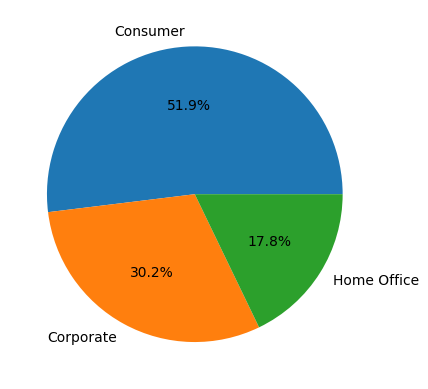

In [7]:
plt.pie(no_of_customers['count'] , labels= no_of_customers['Customer Type'] , autopct = '%1.1f%%' )

# Customer segment vs sales

In [8]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Customer Type' , 'Sales' : 'Total Sales'})
sales_per_segment

,Customer Type,Total Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


<BarContainer object of 3 artists>

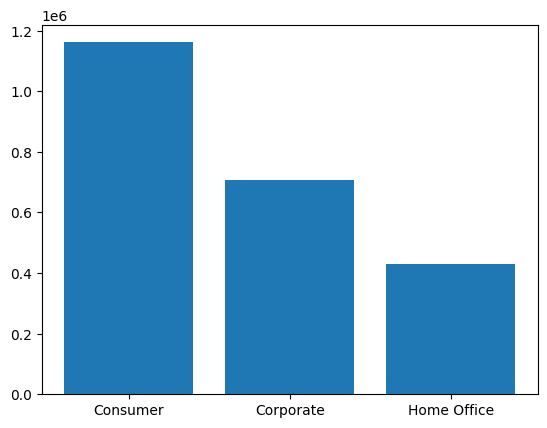

In [9]:
plt.bar(sales_per_segment['Customer Type'],sales_per_segment['Total Sales'])

In [10]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [11]:
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name' , 'Segment'])['Order ID'].count().reset_index()

customer_order_frequency = customer_order_frequency.rename(columns={'Order ID' : 'Total Orders'})

repeated_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1 ]

repeated_customers = repeated_customers.sort_values(by='Total Orders' , ascending=False)

repeated_customers_sorted = repeated_customers.head(10).reset_index()
# top 10 customers by orders
repeated_customers_sorted

,index,Customer ID,Customer Name,Segment,Total Orders
0,787,WB-21850,William Brown,Consumer,37
1,482,MA-17560,Matt Abelman,Home Office,34
2,387,JL-15835,John Lee,Consumer,34
3,606,PP-18955,Paul Prost,Home Office,34
4,257,EH-13765,Edward Hooks,Corporate,32
5,349,JD-15895,Jonathan Doherty,Corporate,32
6,720,SV-20365,Seth Vernon,Consumer,32
7,147,CK-12205,Chloris Kastensmidt,Consumer,32
8,44,AP-10915,Arthur Prichep,Consumer,31
9,275,EP-13915,Emily Phan,Consumer,31


In [12]:
customer_sales_frequency = df.groupby(['Customer ID', 'Customer Name' , 'Segment'])['Sales'].sum().reset_index()

customer_sales_frequency = customer_sales_frequency.rename(columns={'Sales' : 'Total Sales'})

repeated_customers = customer_sales_frequency[customer_sales_frequency['Total Sales'] >= 1 ]

repeated_customers = repeated_customers.sort_values(by='Total Sales' , ascending=False)

repeated_customers_sorted = repeated_customers.head(10).reset_index()
# top 10 customers by sales
repeated_customers_sorted

,index,Customer ID,Customer Name,Segment,Total Sales
0,700,SM-20320,Sean Miller,Home Office,25043.050
1,741,TC-20980,Tamara Chand,Corporate,19052.218
2,621,RB-19360,Raymond Buch,Consumer,15117.339
3,730,TA-21385,Tom Ashbrook,Home Office,14595.620
4,6,AB-10105,Adrian Barton,Consumer,14473.571
5,434,KL-16645,Ken Lonsdale,Consumer,14175.229
6,669,SC-20095,Sanjit Chand,Consumer,14142.334
7,327,HL-15040,Hunter Lopez,Consumer,12873.298
8,683,SE-20110,Sanjit Engle,Consumer,12209.438
9,131,CC-12370,Christopher Conant,Consumer,12129.072


In [13]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [14]:
shipping_model = df['Ship Mode'].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'count':'Frequency'})
shipping_model

,Ship Mode,Frequency
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


([<matplotlib.patches.Wedge at 0x1a299d212d0>,
 [Text(-0.3305657516984502, 1.0491550332548754, 'Standard Class'),
  Text(-0.3760776532491148, -1.0337144667298794, 'Second Class'),
  Text(0.7465350845565396, -0.8078894525404824, 'First Class'),
  Text(1.0840145085529618, -0.18684899048879292, 'Same Day')],
 [Text(-0.18030859183551826, 0.5722663817753865, '60%'),
  Text(-0.20513326540860807, -0.5638442545799341, '19%'),
  Text(0.4072009552126579, -0.44066697411299033, '15%'),
  Text(0.5912806410288882, -0.10191763117570521, '5%')])

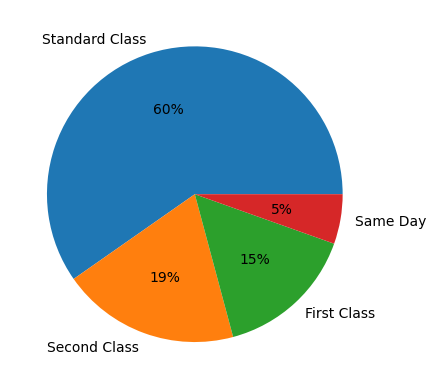

In [15]:
plt.pie(shipping_model['Frequency'] , labels=shipping_model['Ship Mode'], autopct='%0.0f%%')

In [16]:
state_df = df['State'].value_counts().reset_index()
state_df = state_df.rename(columns={'count' : 'Number of Customer'})
state_df.head(20)

,State,Number of Customer
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


In [17]:
city_df = df['City'].value_counts().reset_index()
city_df

,City,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Abilene,1
527,Montebello,1
528,Kissimmee,1
529,Danbury,1


In [18]:
state_sales_df = df.groupby('State')['Sales'].sum().reset_index()

state_sales_df = state_sales_df.sort_values('Sales',ascending=False)

# top sales by stat
state_sales_df.head().reset_index()

,index,State,Sales
0,3,California,457687.6315
1,30,New York,310876.2710
2,41,Texas,170188.0458
3,45,Washington,138641.2700
4,36,Pennsylvania,116511.9140


In [19]:
city_sales_df = df.groupby('City')['Sales'].sum().reset_index()

city_sales_df = city_sales_df.sort_values('Sales' , ascending=False)

# city wise sale
city_sales_df.head().reset_index()

,index,City,Sales
0,329,New York City,256368.161
1,266,Los Angeles,175851.341
2,452,Seattle,119540.742
3,438,San Francisco,112669.092
4,374,Philadelphia,109077.013


In [20]:
product_cate = df['Category'].unique()

product_cate

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [21]:
products_subcate = df['Sub-Category'].unique()

products_subcate

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [22]:
subcategory_df = df.groupby( 'Category')['Sub-Category'].nunique().reset_index()

subcategory_df = subcategory_df.sort_values('Sub-Category' , ascending=False)

subcategory_df

,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [23]:
subcategory_sales_df = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

subcategory_sales_df = subcategory_sales_df.sort_values('Sales' , ascending= False)

subcategory_sales_df

,Category,Sub-Category,Sales
16,Technology,Phones,330007.0540
1,Furniture,Chairs,328449.1030
11,Office Supplies,Storage,223843.6080
3,Furniture,Tables,206965.5320
6,Office Supplies,Binders,203412.7330
15,Technology,Machines,189238.6310
13,Technology,Accessories,167380.3180
14,Technology,Copiers,149528.0300
0,Furniture,Bookcases,114879.9963
4,Office Supplies,Appliances,107532.1610


In [24]:
category_sales_df = df.groupby('Category')['Sales'].sum().reset_index()
category_sales_df = category_sales_df.sort_values('Sales' , ascending=False)
category_sales_df

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


# category technology has more sales 

([<matplotlib.patches.Wedge at 0x1a299d43910>,
 [Text(0.4558501937655543, 1.001099695756575, 'Technology'),
  Text(-1.0859232694701606, -0.17541565729215064, 'Furniture'),
  Text(0.6096608927243867, -0.9155946678975931, 'Office Supplies')],
 [Text(0.24864556023575687, 0.5460543795035863, '36%'),
  Text(-0.5923217833473602, -0.09568126761390033, '32%'),
  Text(0.3325423051223927, -0.49941527339868713, '31%')])

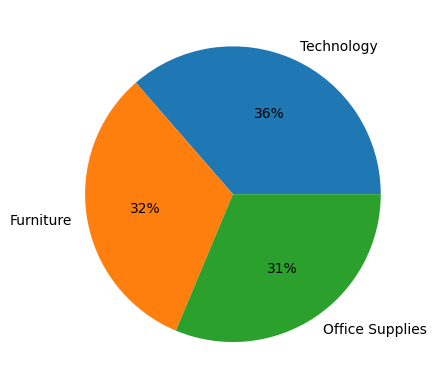

In [25]:
plt.pie(category_sales_df['Sales'], labels=category_sales_df['Category'] , autopct = '%0.0f%%' )

In [26]:
sub_category_sales_df = df.groupby('Sub-Category')['Sales'].sum().reset_index()
sub_category_sales_df = sub_category_sales_df.sort_values('Sales' , ascending=False)
sub_category_sales_df

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


# Phones are having more Sale

<BarContainer object of 17 artists>

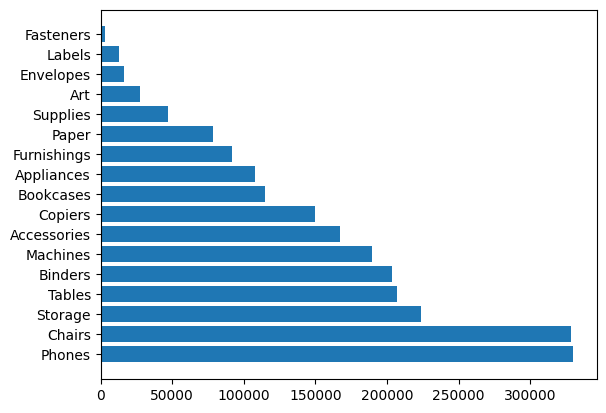

In [27]:
plt.barh(sub_category_sales_df['Sub-Category'],sub_category_sales_df['Sales'])

In [29]:
test = pd.DataFrame({
           'key' : ['a','b','c'] 
        ,  'value' : [1,1,2] 
    })

test

,key,value
0,a,1
1,b,1
2,c,2


In [30]:
test = test.sort_values('value' , ascending=False)
test = test['value'].unique()
test

array([2, 1])

In [31]:
column = df['Category'].tolist()

list = []

for a,b,c, in zip(column,column[1:],column[2:]):
    if a == b and a == c:
        list.append(a) 


td = pd.DataFrame(list)



In [32]:
td.head()

,0
0,Office Supplies
1,Office Supplies
2,Office Supplies
3,Office Supplies
4,Office Supplies


In [33]:
ttd = td[0].unique()

In [34]:
ttd = pd.DataFrame(ttd)

In [35]:
ttd = ttd.rename(columns={0:'test'})

In [36]:
ttd

,test
0,Office Supplies
1,Technology
2,Furniture


In [37]:
data = pd.DataFrame( {
    'id': [1, 2, 3, 4],
    'name': ['Joe', 'Henry', 'Sam', 'Max'],
    'salary': [70000, 80000, 60000, 90000],
    'managerId': [3, 4, None, None]  # 'None' is used to represent Null
}
)

data

manager = data.copy()

In [38]:
test_df = pd.merge(manager, data, how = 'left', left_on='id' , right_on= 'managerId' , indicator=True ) 
test_df
# test_df = test_df[test_df['salary_y'] > test_df['salary_x']]
# test_df = test_df.rename(columns={'name_y':'Employee'})
# test_df

,id_x,name_x,salary_x,managerId_x,id_y,name_y,salary_y,managerId_y,_merge
0,1,Joe,70000,3.0,NaN,NaN,NaN,NaN,left_only
1,2,Henry,80000,4.0,NaN,NaN,NaN,NaN,left_only
2,3,Sam,60000,NaN,1.0,Joe,70000.0,3.0,both
3,4,Max,90000,NaN,2.0,Henry,80000.0,4.0,both


In [45]:
test_df.drop_duplicates('name_y' , inplace= True  ,keep='first')

test_df

,id_x,name_x,salary_x,managerId_x,id_y,name_y,salary_y,managerId_y,_merge
0,1,Joe,70000,3.0,NaN,NaN,NaN,NaN,left_only
2,3,Sam,60000,NaN,1.0,Joe,70000.0,3.0,both
3,4,Max,90000,NaN,2.0,Henry,80000.0,4.0,both


In [46]:
test_df.drop_duplicates('name_y' , inplace= True  ,keep='last')

test_df

,id_x,name_x,salary_x,managerId_x,id_y,name_y,salary_y,managerId_y,_merge
0,1,Joe,70000,3.0,NaN,NaN,NaN,NaN,left_only
2,3,Sam,60000,NaN,1.0,Joe,70000.0,3.0,both
3,4,Max,90000,NaN,2.0,Henry,80000.0,4.0,both
